**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset and previewing it

df = pd.read_csv("aerofit_treadmill.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.shape

(180, 9)

In [ ]:
# Checking the structure of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
# Getting a statistical summary of the dataset

df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
# Checking for missing values

missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


In [ ]:
# Checking for duplicate rows

duplicates = df.duplicated()

# Counting the number of duplicate rows
num_duplicates = duplicates.sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


In [ ]:
# Check unique values of categorical variables

print("Unique values :", df['Product'].unique())
print("Unique values :", df['Gender'].unique())
print("Unique values :", df['MaritalStatus'].unique())

Unique values : ['KP281' 'KP481' 'KP781']
Unique values : ['Male' 'Female']
Unique values : ['Single' 'Partnered']


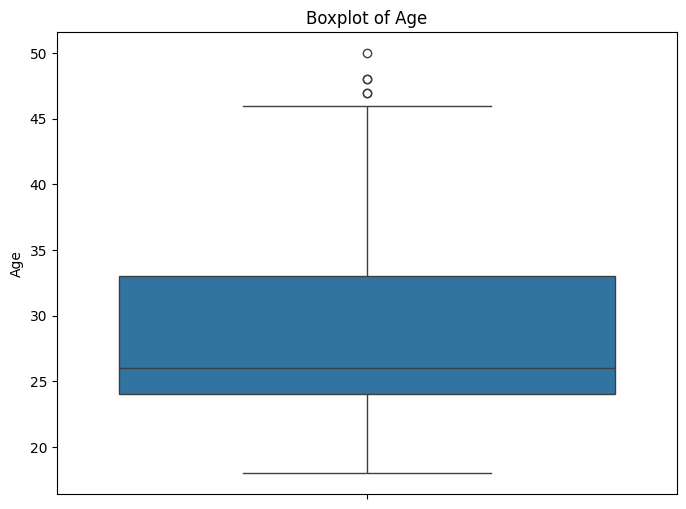

Mean of Age: 28.788888888888888
Median of Age: 26.0
Difference between mean and median of Age: 2.788888888888888


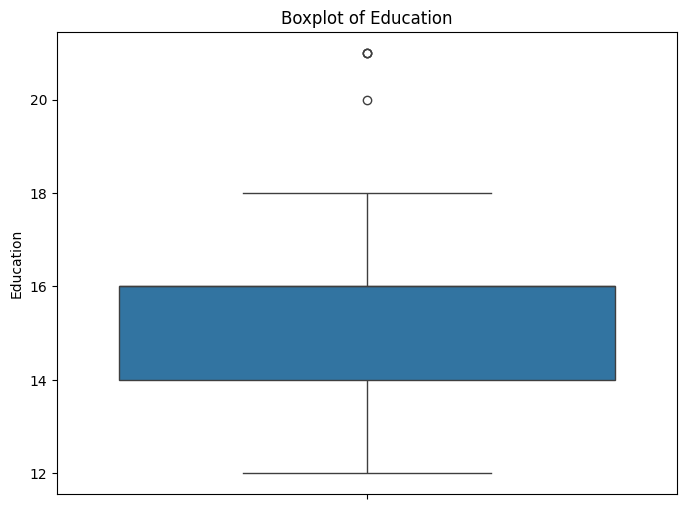

Mean of Education: 15.572222222222223
Median of Education: 16.0
Difference between mean and median of Education: -0.42777777777777715


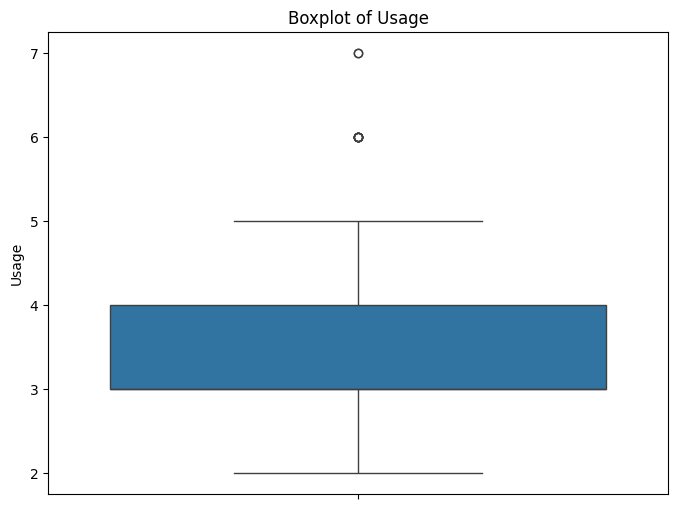

Mean of Usage: 3.4555555555555557
Median of Usage: 3.0
Difference between mean and median of Usage: 0.4555555555555557


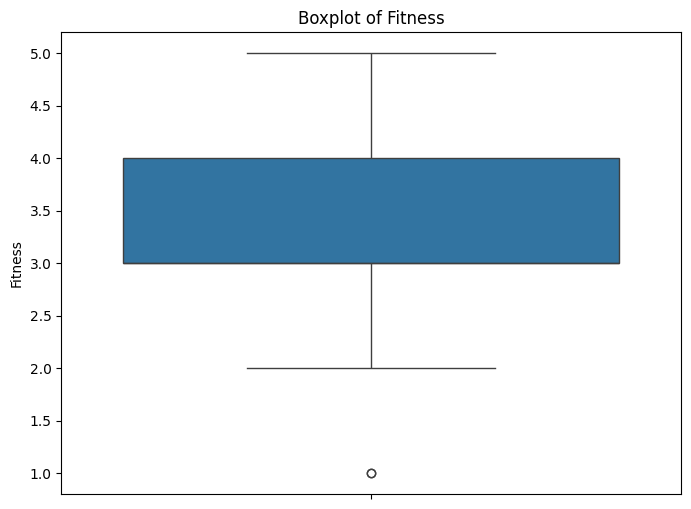

Mean of Fitness: 3.311111111111111
Median of Fitness: 3.0
Difference between mean and median of Fitness: 0.3111111111111109


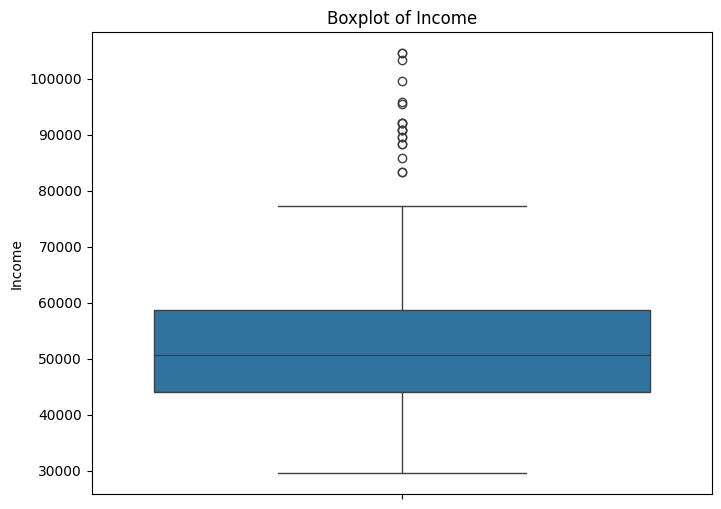

Mean of Income: 53719.57777777778
Median of Income: 50596.5
Difference between mean and median of Income: 3123.0777777777766


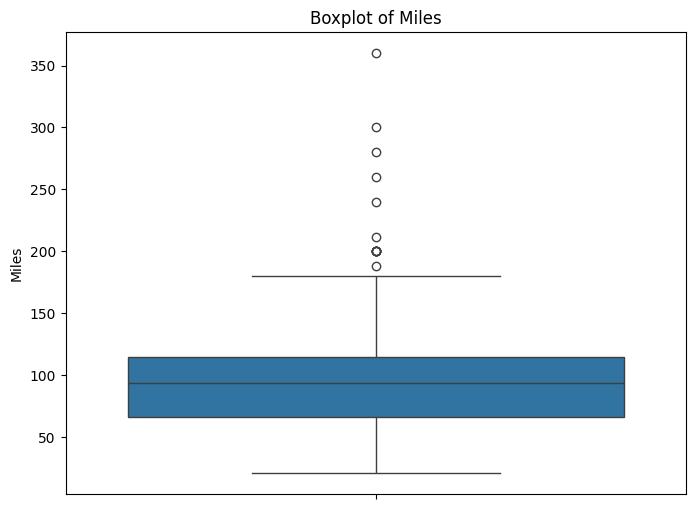

Mean of Miles: 103.19444444444444
Median of Miles: 94.0
Difference between mean and median of Miles: 9.194444444444443


In [ ]:
# Select numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['int64']).columns

# Plot boxplots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.show()

    # Calculate mean and median
    mean_val = df[col].mean()
    median_val = df[col].median()

    print(f"Mean of {col}: {mean_val}")
    print(f"Median of {col}: {median_val}")

    # Calculate the difference between mean and median
    diff = mean_val - median_val
    print(f"Difference between mean and median of {col}: {diff}")

In [ ]:
# Display the unique values and their counts for each column
for col in df.columns:
    print(f"Column: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Unique values:\n{df[col].unique()}\n")

    # If the column has less than 10 unique values, also display value counts
    if df[col].nunique() <= 10:
        print(f"Value counts:\n{df[col].value_counts()}\n")

Column: Product
Number of unique values: 3
Unique values:
['KP281' 'KP481' 'KP781']

Value counts:
Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

Column: Age
Number of unique values: 32
Unique values:
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

Column: Gender
Number of unique values: 2
Unique values:
['Male' 'Female']

Value counts:
Gender
Male      104
Female     76
Name: count, dtype: int64

Column: Education
Number of unique values: 8
Unique values:
[14 15 12 13 16 18 20 21]

Value counts:
Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

Column: MaritalStatus
Number of unique values: 2
Unique values:
['Single' 'Partnered']

Value counts:
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

Column: Usage
Number of unique values: 6
Unique values:
[3 2 4 5 6 7]

Value counts:
Usage
3    69
4    52
2    33
5    17
6     7
7    

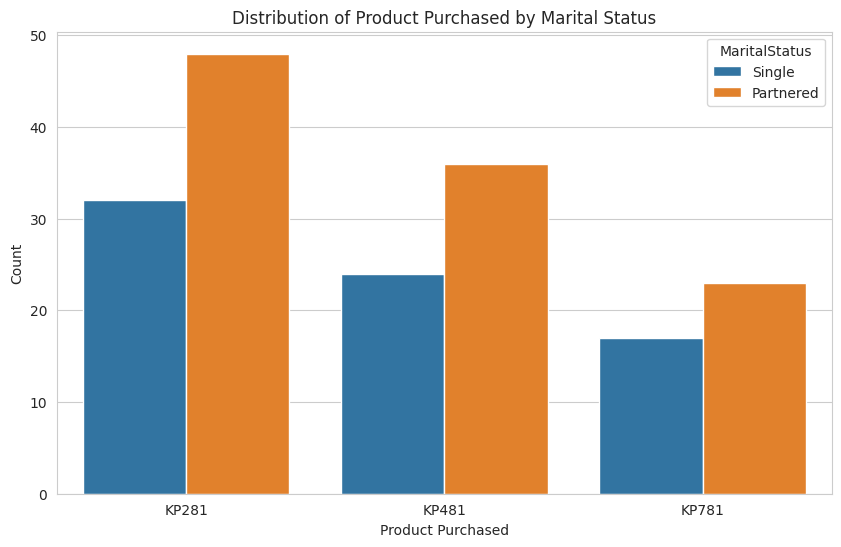

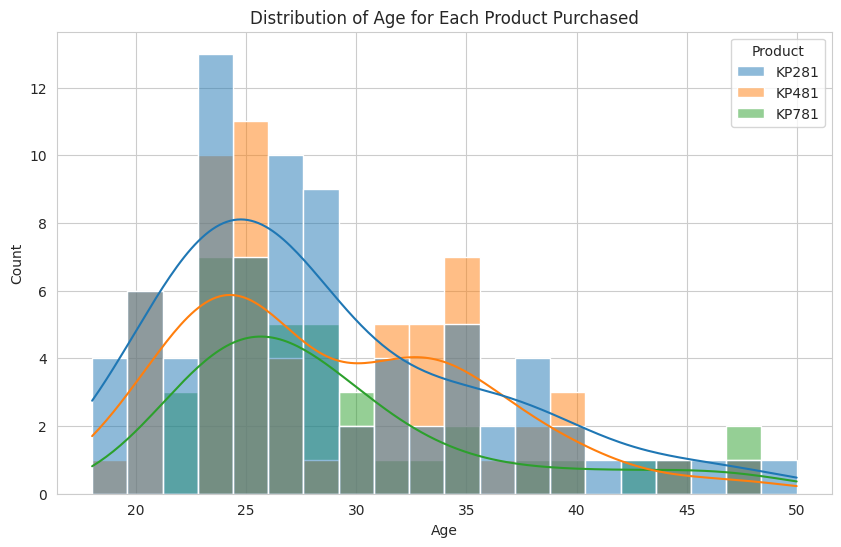

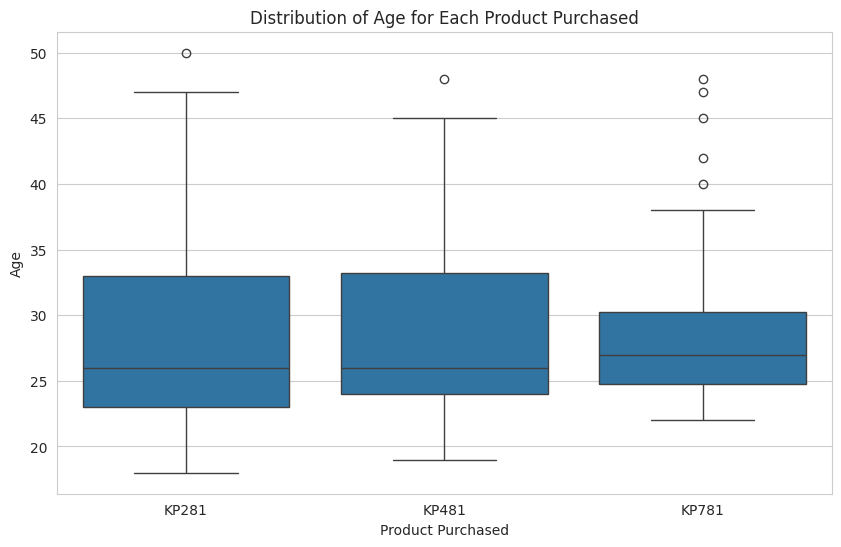

In [ ]:
# Set the style of the plots
sns.set_style("whitegrid")

# Create a countplot to visualize the distribution of product purchased based on marital status
plt.figure(figsize=(10, 6))
sns.countplot(x="Product", hue="MaritalStatus", data=df)
plt.title("Distribution of Product Purchased by Marital Status")
plt.xlabel("Product Purchased")
plt.ylabel("Count")
plt.show()

# Create a histogram to visualize the distribution of age for each product purchased
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", hue="Product", kde=True, bins=20)
plt.title("Distribution of Age for Each Product Purchased")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Create a boxplot to visualize the distribution of age for each product purchased
plt.figure(figsize=(10, 6))
sns.boxplot(x="Product", y="Age", data=df)
plt.title("Distribution of Age for Each Product Purchased")
plt.xlabel("Product Purchased")
plt.ylabel("Age")
plt.show()

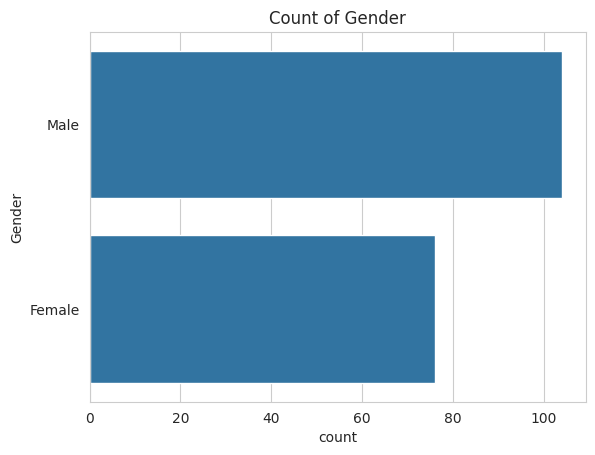

In [ ]:
sns.countplot(df['Gender'])
plt.title('Count of Gender')
plt.show()

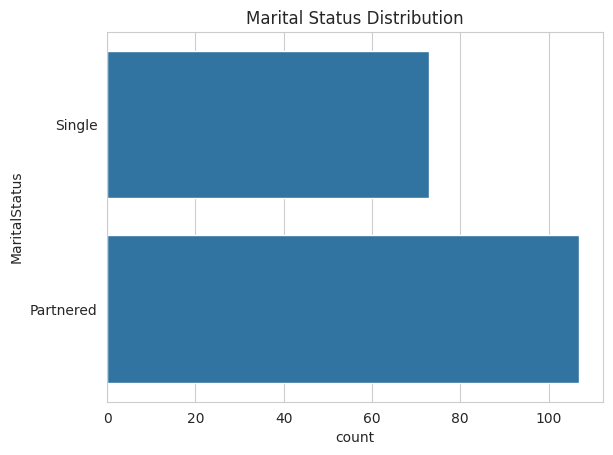

In [ ]:
sns.countplot(df['MaritalStatus'])
plt.title('Marital Status Distribution')
plt.show()

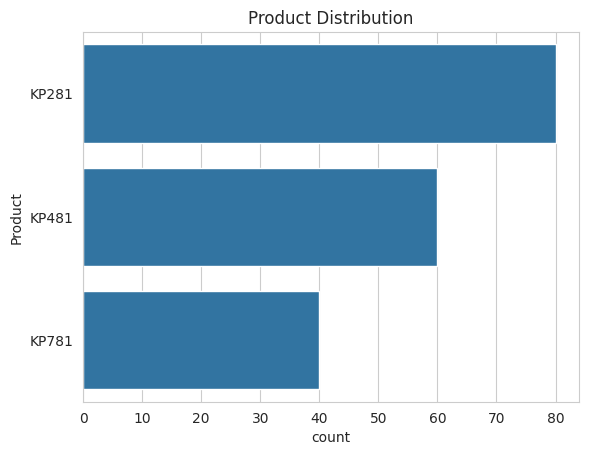

In [ ]:
sns.countplot(df['Product'])
plt.title('Product Distribution')
plt.show()

<ipython-input-15-4226616f2e34>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


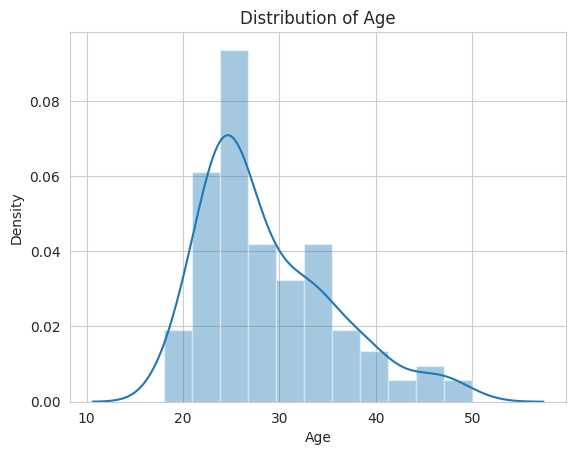

In [ ]:
# Distplot
sns.distplot(df['Age'])
plt.title('Distribution of Age')
plt.show()

<ipython-input-16-6821fed00a76>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Education'])


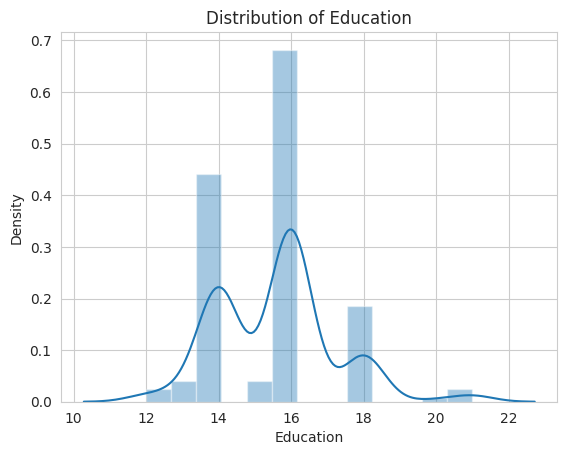

In [ ]:
# Distplot
sns.distplot(df['Education'])
plt.title('Distribution of Education')
plt.show()

<ipython-input-17-9e284c0404b2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Usage'])


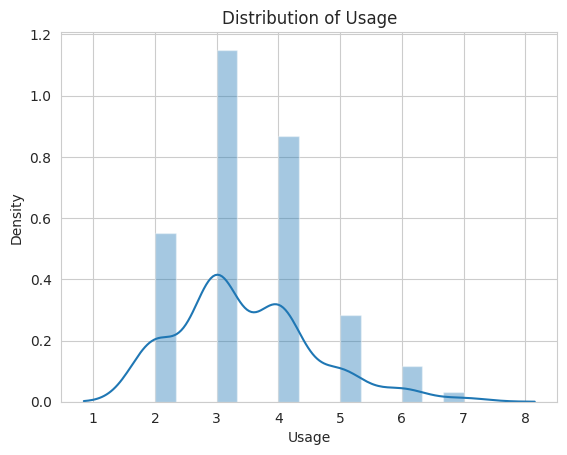

In [ ]:
# Distplot
sns.distplot(df['Usage'])
plt.title('Distribution of Usage')
plt.show()

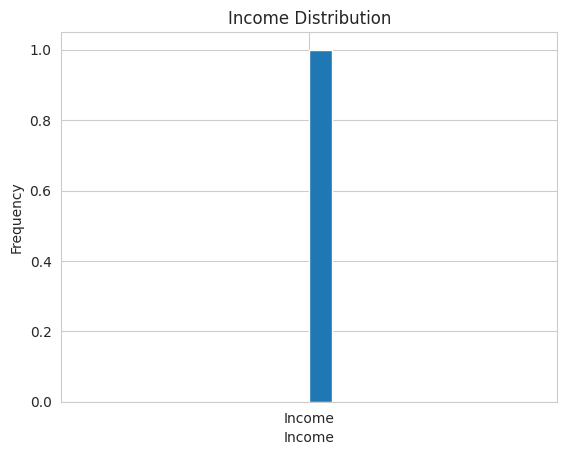

In [ ]:
plt.hist(['Income'], bins=20)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

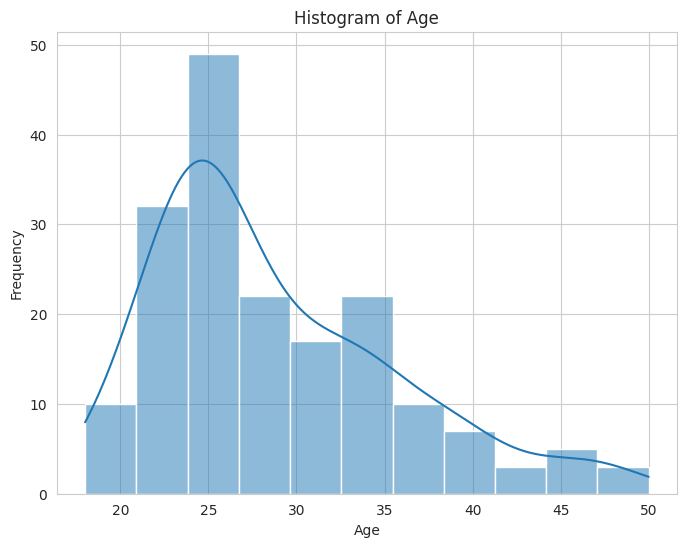

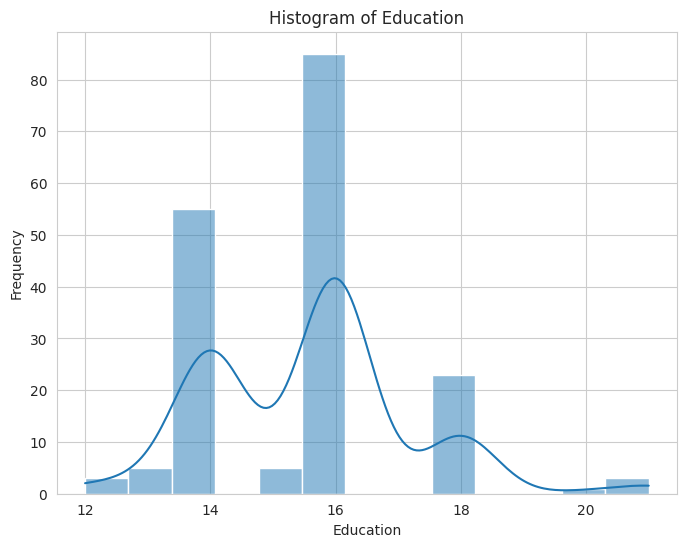

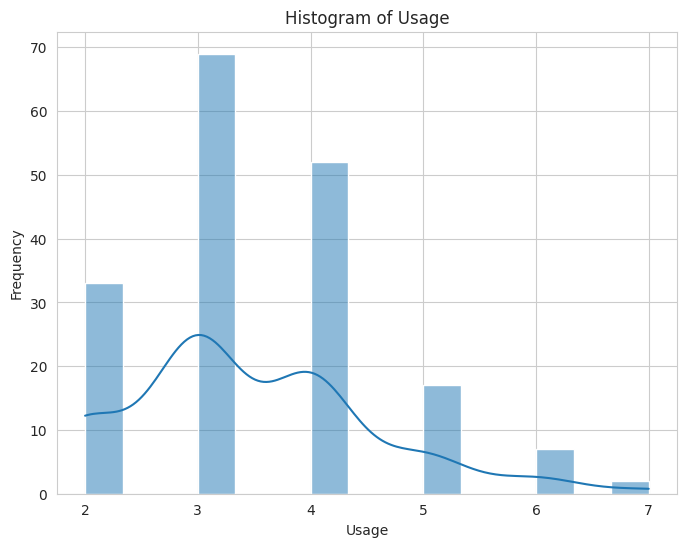

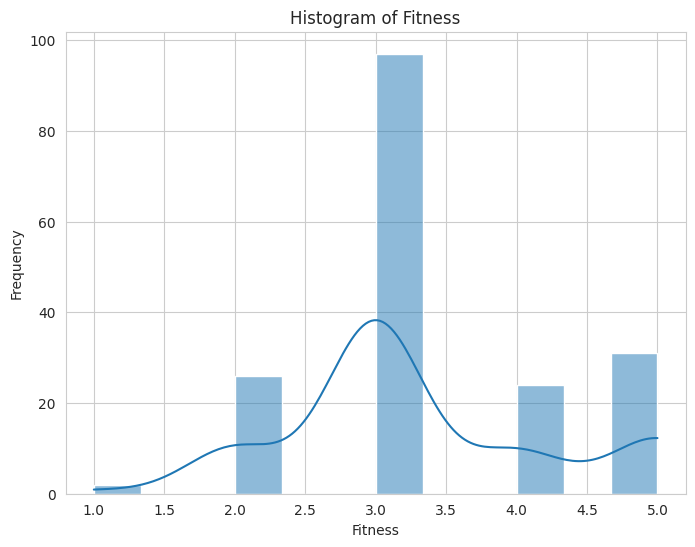

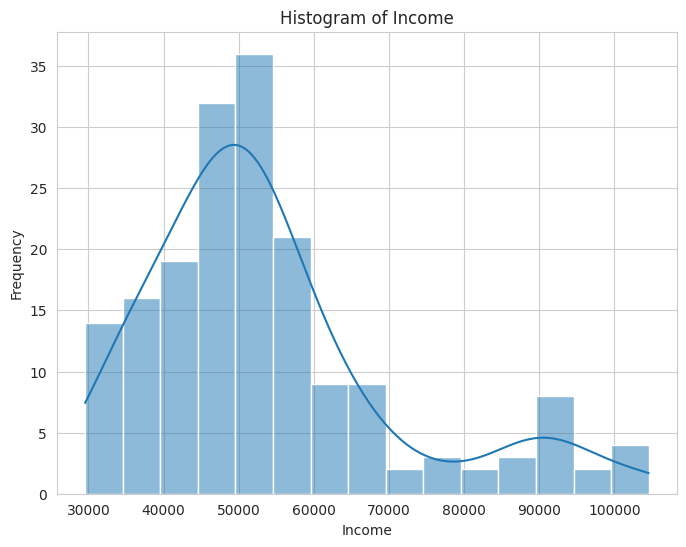

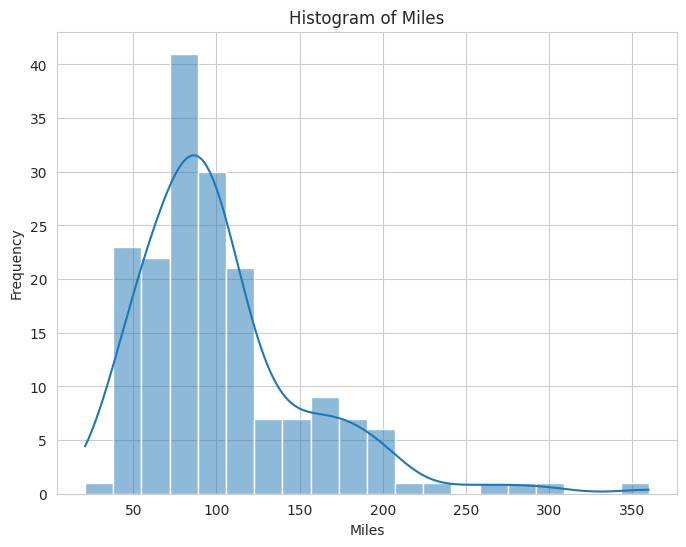

In [ ]:
numerical_columns = df.select_dtypes(include=['int64'])

# Plot histograms for each numeric column
for col in numerical_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

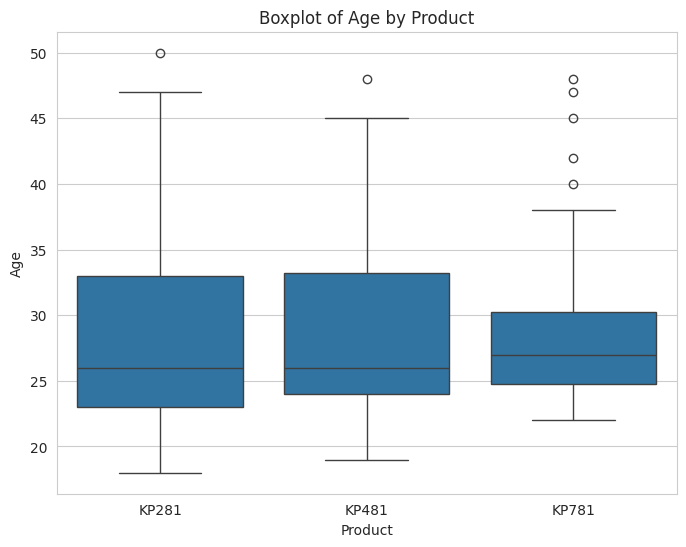

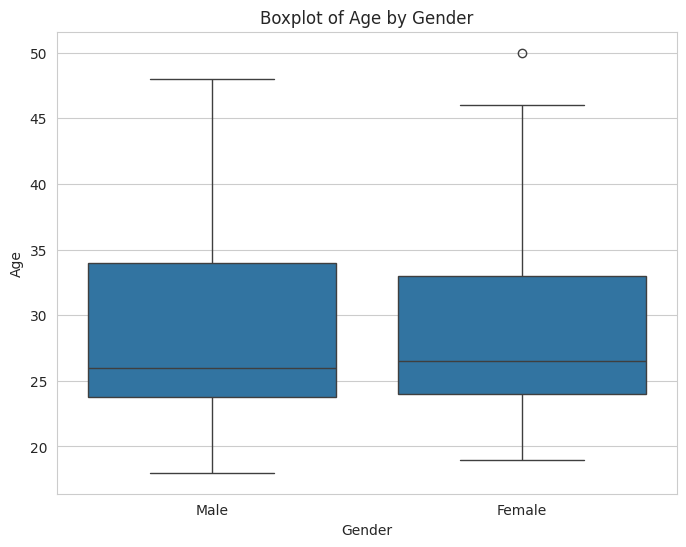

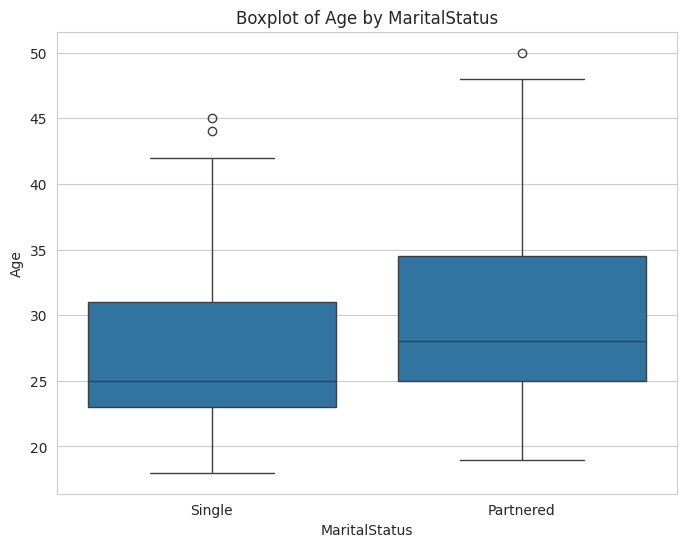

In [ ]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, y='Age', data=df)
    plt.title(f'Boxplot of Age by {column}')
    plt.xlabel(column)
    plt.ylabel('Age')
    plt.show()

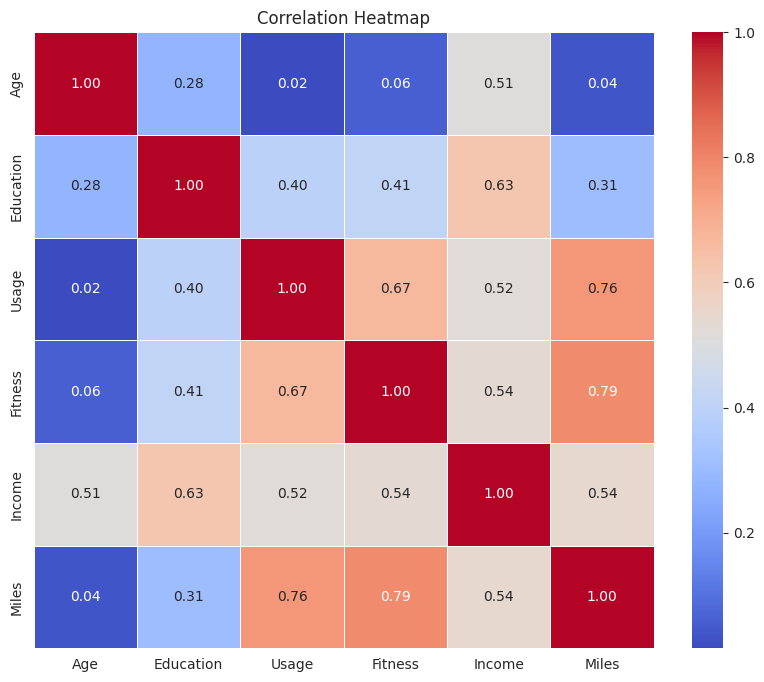

In [ ]:
# Calculate the correlation matrix
numeric_data = df.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

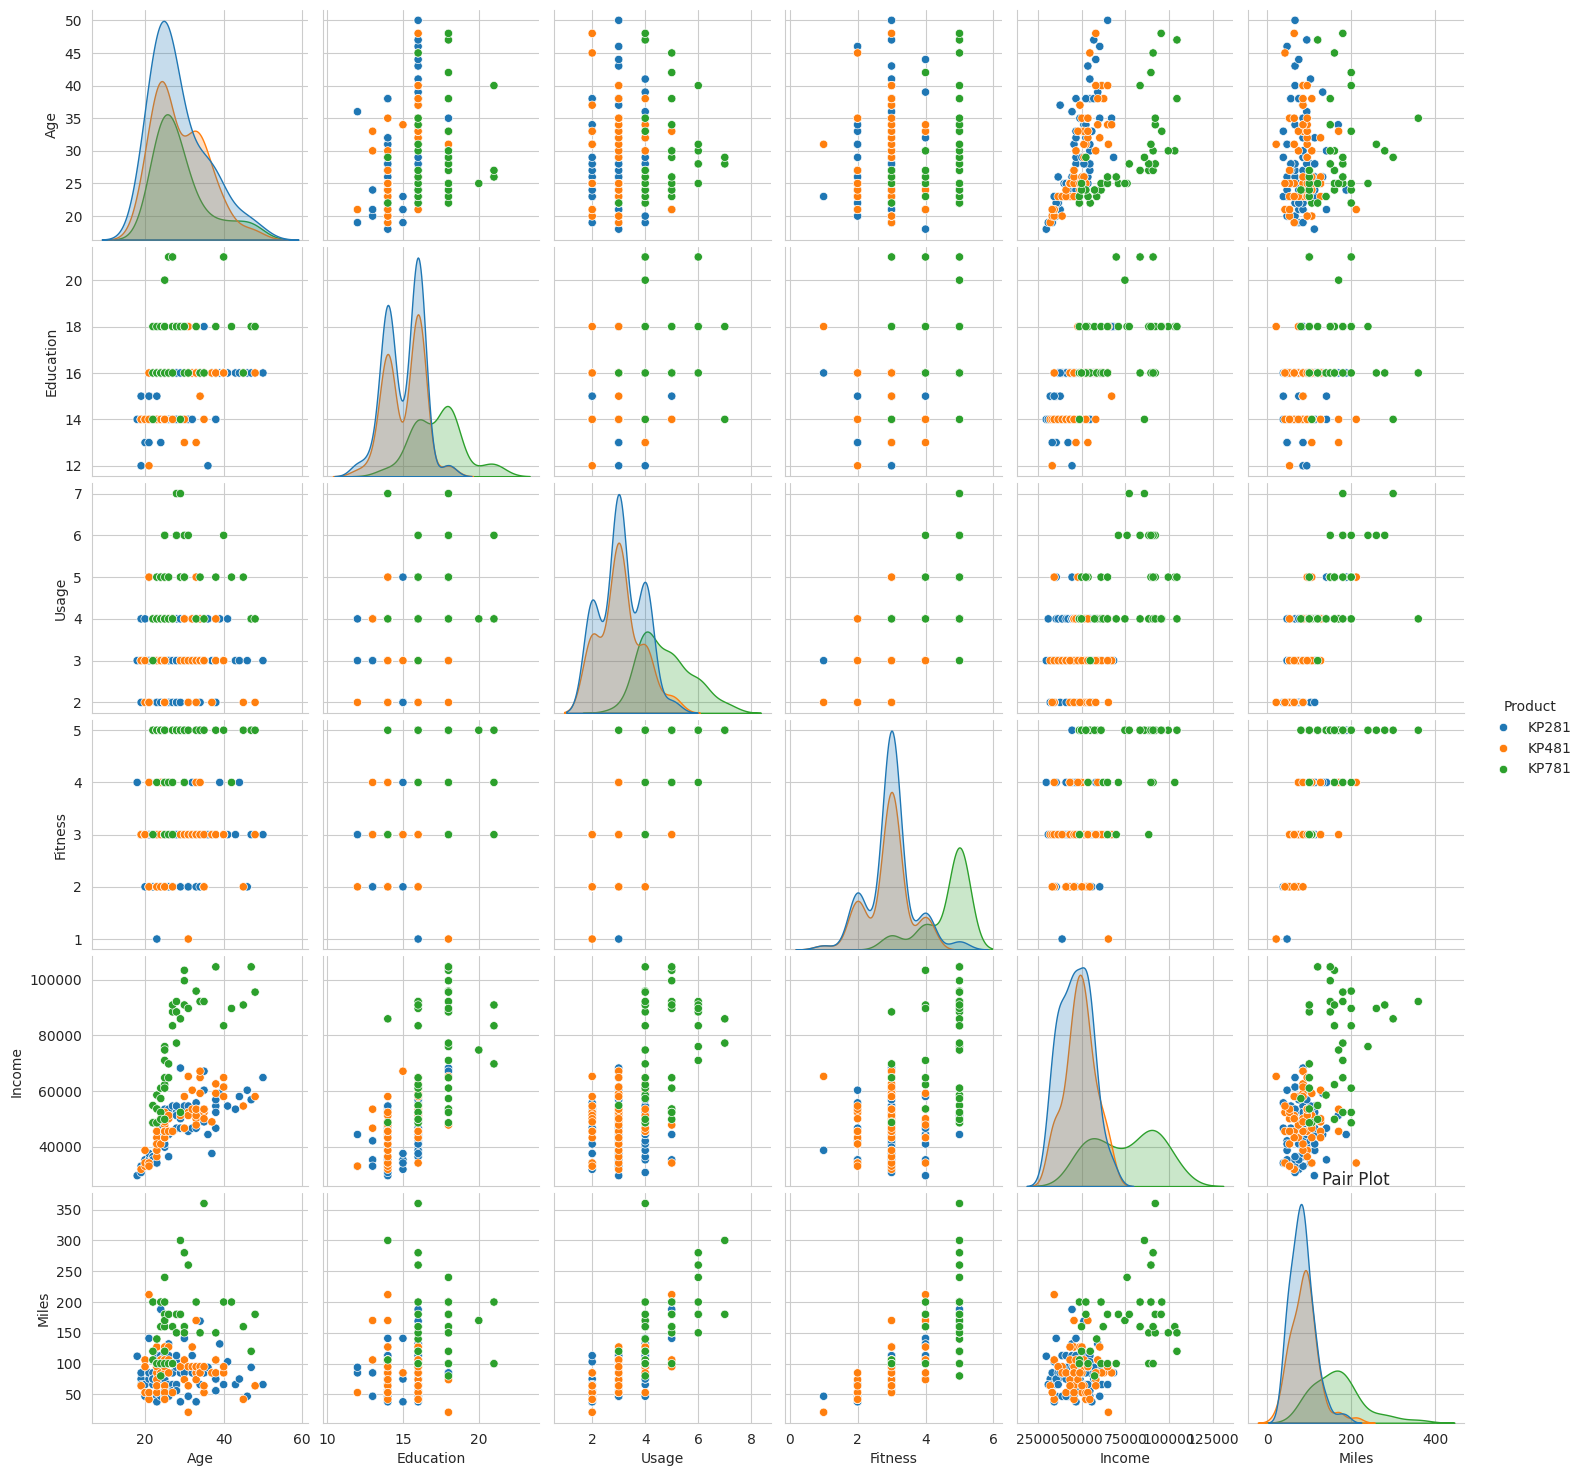

In [ ]:
# Pair plot
sns.pairplot(df, hue="Product")
plt.title("Pair Plot")
plt.show()

In [ ]:
# Create a crosstab to calculate the counts of each product purchased
product_counts = pd.crosstab(index=df["Product"], columns="% Share")

# Calculate the marginal probability (percentage) of each product purchased
marginal_probability = product_counts / product_counts.sum() * 100

print("Marginal Probability of Purchasing Each Product:")

print(marginal_probability)

Marginal Probability of Purchasing Each Product:
col_0      % Share
Product           
KP281    44.444444
KP481    33.333333
KP781    22.222222


In [ ]:
# Count the total number of male customers
total_male_customers = len(df[df['Gender'] == 'Male'])

# Count the number of male customers who bought a KP781 treadmill
male_kp781_customers = len(df[(df['Gender'] == 'Male') & (df['Product'] == 'KP781')])

# Calculate the probability
probability_male_kp781 = male_kp781_customers / total_male_customers

print("Probability of a male customer buying a KP781 treadmill:", probability_male_kp781)

Probability of a male customer buying a KP781 treadmill: 0.3173076923076923


In [ ]:
# Calculate conditional probability of Product Purchased given Gender is Male

conditional_probability_male = df[df['Gender'] == 'Male']['Product'].value_counts() / len(df[df['Gender'] == 'Male'])
conditional_probability_male

Product
KP281    0.384615
KP781    0.317308
KP481    0.298077
Name: count, dtype: float64

In [ ]:
# Calculate conditional probability of Product Purchased given Gender is Female

conditional_probability_female = df[df['Gender'] == 'Female']['Product'].value_counts() / len(df[df['Gender'] == 'Female'])
conditional_probability_female

Product
KP281    0.526316
KP481    0.381579
KP781    0.092105
Name: count, dtype: float64

In [ ]:
#Conditional Probability of Product Purchased given Marital Status is Single:

conditional_probability_single = df[df['MaritalStatus'] == 'Single']['Product'].value_counts() / len(df[df['MaritalStatus'] == 'Single'])
conditional_probability_single

Product
KP281    0.438356
KP481    0.328767
KP781    0.232877
Name: count, dtype: float64

In [ ]:
#Conditional Probability of Fitness Rating being 5 given Income is above $60,000:

conditional_probability_fitness_5_given_high_income = df[df['Income'] > 60000]['Fitness'].value_counts() / len(df[df['Income'] > 60000])
conditional_probability_fitness_5_given_high_income

Fitness
5    0.476190
3    0.333333
4    0.142857
2    0.023810
1    0.023810
Name: count, dtype: float64

In [ ]:
# The likelihood of a customer being under 30 years old

conditional_probability_age_under_30 = df['Age'].value_counts(normalize=True).loc[:29].sum()
conditional_probability_age_under_30

0.8055555555555555

In [ ]:
# Calculate the probability of customer being under 30 years old
probability_condition = df['Age'].value_counts(normalize=True).loc[:29].sum()

# Calculate the probability of each product given the condition
conditional_probabilities = {}
for product in df['Product'].unique():

    probability_product_given_condition = df[df['Age'] <= 29]['Product'].value_counts(normalize=True)[product]

    # Calculate the conditional probability for each product
    conditional_probability = probability_product_given_condition / probability_condition
    conditional_probabilities[product] = conditional_probability

# Printing conditional probabilities for all products
for product, probability in conditional_probabilities.items():
    print(f"Conditional probability of buying {product} for customers under 30 years old: {probability}")


Conditional probability of buying KP281 for customers under 30 years old: 0.5822398535245652
Conditional probability of buying KP481 for customers under 30 years old: 0.3625267012511444
Conditional probability of buying KP781 for customers under 30 years old: 0.29661275556911815


In [ ]:
# Construct contingency tables for each product
contingency_tables = {}

for product in df['Product'].unique():
    product_df = df[df['Product'] == product]
    contingency_table = pd.crosstab(product_df['Gender'], product_df['MaritalStatus'])
    contingency_tables[product] = contingency_table

# Display contingency tables
for product, table in contingency_tables.items():
    print(f"\nContingency Table for {product}:")
    print(table)

# Compute marginal probabilities
marginal_probabilities = {}

for product, table in contingency_tables.items():
    marginal_probabilities[product] = table / table.values.sum()

# Display marginal probabilities
for product, probabilities in marginal_probabilities.items():
    print(f"\nMarginal Probabilities for {product}:")
    print(probabilities)

# Compute conditional probabilities
conditional_probabilities = {}

for product, table in contingency_tables.items():
    conditional_probabilities[product] = table.div(table.sum(axis=1), axis=0)

# Display conditional probabilities
for product, probabilities in conditional_probabilities.items():
    print(f"\nConditional Probabilities for {product}:")
    print(probabilities)


Contingency Table for KP281:
MaritalStatus  Partnered  Single
Gender                          
Female                27      13
Male                  21      19

Contingency Table for KP481:
MaritalStatus  Partnered  Single
Gender                          
Female                15      14
Male                  21      10

Contingency Table for KP781:
MaritalStatus  Partnered  Single
Gender                          
Female                 4       3
Male                  19      14

Marginal Probabilities for KP281:
MaritalStatus  Partnered  Single
Gender                          
Female            0.3375  0.1625
Male              0.2625  0.2375

Marginal Probabilities for KP481:
MaritalStatus  Partnered    Single
Gender                            
Female              0.25  0.233333
Male                0.35  0.166667

Marginal Probabilities for KP781:
MaritalStatus  Partnered  Single
Gender                          
Female             0.100   0.075
Male               0.475   0.350

Cond

**INSIGHTS**

KP281 Treadmill:

- There are more partnered females (27) than single females (13) who purchased this treadmill, indicating that partnered females are more likely to buy this entry-level product.

- The marginal probability of partnered females purchasing KP281 is higher (0.3375) compared to single females (0.1625), suggesting that partnered females are the primary customers for this treadmill.

- The conditional probability of partnered females purchasing KP281 (0.675) is higher than single females (0.325), reinforcing that partnered females are more inclined towards this product compared to single females.



KP481 Treadmill:

- Both partnered and single males show a higher count of purchases compared to females for this mid-level treadmill.

- The marginal probability of males purchasing KP481 is higher (0.35 for partnered and 0.1667 for single) compared to females (0.25 for partnered and 0.2333 for single), indicating that males are the primary customers for this treadmill.

- The conditional probabilities suggest that both partnered and single males are more likely to purchase KP481 compared to females.



KP781 Treadmill:

- There is a notable difference in the number of purchases between partnered males (19) and single males (14), indicating that both demographics are interested in this advanced-level treadmill.

- The marginal probability of males purchasing KP781 is significantly higher (0.475 for partnered and 0.350 for single) compared to females (0.100 for partnered and 0.075 for single), suggesting that males are the dominant customers for this treadmill.

- The conditional probabilities for males purchasing KP781 are quite similar regardless of marital status, indicating that males are equally likely to purchase this treadmill regardless of their relationship status.

In [ ]:
education_treadmill_contingency = pd.crosstab(df['Education'], df['Product'])

# Print the contingency table
print("Contingency Table for Education Level vs. Treadmill Product Purchased:")
print(education_treadmill_contingency)

# Compute marginal probabilities
marginal_prob_education = education_treadmill_contingency.div(education_treadmill_contingency.sum(axis=1), axis=0)
marginal_prob_treadmill = education_treadmill_contingency.div(education_treadmill_contingency.sum(axis=0), axis=1)

# Compute conditional probabilities
conditional_prob_education_given_product = education_treadmill_contingency.div(education_treadmill_contingency.sum(axis=1), axis=0)
conditional_prob_product_given_education = education_treadmill_contingency.div(education_treadmill_contingency.sum(axis=0), axis=1)

# Print the contingency table
print("Contingency Table for Education Level vs. Treadmill Product Purchased:")
print(education_treadmill_contingency)
print()

# Print the marginal probabilities
print("Marginal Probabilities for Education Level:")
print(marginal_prob_education)
print()

print("Marginal Probabilities for Treadmill Product Purchased:")
print(marginal_prob_treadmill)
print()

# Print the conditional probabilities
print("Conditional Probabilities for Education Level given Treadmill Product Purchased:")
print(conditional_prob_education_given_product)
print()

print("Conditional Probabilities for Treadmill Product Purchased given Education Level:")
print(conditional_prob_product_given_education)


Contingency Table for Education Level vs. Treadmill Product Purchased:
Product    KP281  KP481  KP781
Education                     
12             2      1      0
13             3      2      0
14            30     23      2
15             4      1      0
16            39     31     15
18             2      2     19
20             0      0      1
21             0      0      3
Contingency Table for Education Level vs. Treadmill Product Purchased:
Product    KP281  KP481  KP781
Education                     
12             2      1      0
13             3      2      0
14            30     23      2
15             4      1      0
16            39     31     15
18             2      2     19
20             0      0      1
21             0      0      3

Marginal Probabilities for Education Level:
Product       KP281     KP481     KP781
Education                              
12         0.666667  0.333333  0.000000
13         0.600000  0.400000  0.000000
14         0.545455  0.418182  0.

**INSIGHTS:**


- Education level seems to have some influence on the choice of treadmill product, particularly for customers with an education level of 18, who show a strong preference for KP781.

- For customers with an education level of 16, there is a relatively even distribution across all treadmill products, suggesting that factors other than education level might play a role in their purchasing decision.

- The marginal and conditional probabilities provide evidence for targeting marketing strategies towards specific education demographics. For instance, advertising campaigns targeting customers with an education level of 18 could focus more on the features and benefits of KP781, while campaigns targeting customers with an education level of 16 could highlight the unique selling points of each treadmill product to appeal to their diverse preferences.

In [ ]:

# Define the income slabs
income_slabs = {
    'Low': (0, 30000),
    'Medium': (30001, 60000),
    'High': (60001, float('inf'))
}

# Create a new column for income category
def categorize_income(income):
    for category, (lower, upper) in income_slabs.items():
        if lower <= income <= upper:
            return category
    return None

df['Income_Category'] = df['Income'].apply(categorize_income)


In [ ]:
income_treadmill_contingency = pd.crosstab(df['Income_Category'], df['Product'])

# Compute marginal probabilities
marginal_prob_income = income_treadmill_contingency.div(income_treadmill_contingency.sum(axis=1), axis=0)
marginal_prob_treadmill = income_treadmill_contingency.div(income_treadmill_contingency.sum(axis=0), axis=1)

# Compute conditional probabilities
conditional_prob_income_given_product = income_treadmill_contingency.div(income_treadmill_contingency.sum(axis=1), axis=0)
conditional_prob_product_given_income = income_treadmill_contingency.div(income_treadmill_contingency.sum(axis=0), axis=1)

# Print the contingency table
print("Contingency Table for Income Level vs. Treadmill Product Purchased:")
print(income_treadmill_contingency)
print()

# Print the marginal probabilities
print("Marginal Probabilities for Income Level:")
print(marginal_prob_income)
print()

print("Marginal Probabilities for Treadmill Product Purchased:")
print(marginal_prob_treadmill)
print()

# Print the conditional probabilities
print("Conditional Probabilities for Income Level given Treadmill Product Purchased:")
print(conditional_prob_income_given_product)
print()

print("Conditional Probabilities for Treadmill Product Purchased given Income Level:")
print(conditional_prob_product_given_income)

Contingency Table for Income Level vs. Treadmill Product Purchased:
Product          KP281  KP481  KP781
Income_Category                     
High                 6      7     29
Low                  1      0      0
Medium              73     53     11

Marginal Probabilities for Income Level:
Product             KP281     KP481     KP781
Income_Category                              
High             0.142857  0.166667  0.690476
Low              1.000000  0.000000  0.000000
Medium           0.532847  0.386861  0.080292

Marginal Probabilities for Treadmill Product Purchased:
Product           KP281     KP481  KP781
Income_Category                         
High             0.0750  0.116667  0.725
Low              0.0125  0.000000  0.000
Medium           0.9125  0.883333  0.275

Conditional Probabilities for Income Level given Treadmill Product Purchased:
Product             KP281     KP481     KP781
Income_Category                              
High             0.142857  0.166667  0.690

**INSIGHTS :**

- The evidence shows that among customers with high income, the majority (approximately 69.05%) prefer to purchase KP781.

-  The medium-income category, KP281 and KP481 are the dominant choices, constituting approximately 53.28% and 38.69% of purchases, respectively. This indicates that these treadmill models may offer features or pricing that resonate well with customers in this income bracket.

- The data indicates that customers with low income tend not to favour any of the offered treadmill products. This could suggest that the pricing of these products might be prohibitive for individuals in this income segment, leading to minimal adoption.

**RECOMMENDATIONS**



- **Target High-Income Individuals for KP781**: Focus marketing efforts on high-income demographics, highlighting the premium features and benefits of KP781 to resonate with their preferences for high-end products.

- **Diversify Marketing Strategies for Medium-Income Segment**: Since KP281 and KP481 are preferred choices among medium-income customers, tailor marketing campaigns to highlight the unique selling points of each treadmill model, catering to the specific needs and preferences of this demographic.

- **Explore Pricing Strategies for Low-Income Segment**: Investigate pricing options or promotional strategies to make treadmill products more accessible to customers with low income, potentially introducing entry-level models or flexible payment plans to encourage adoption within this segment.

- **Customized Education-Level Targeting**: Develop targeted advertising campaigns that align with the preferences of different education demographics. For instance, emphasize the advanced features of KP781 to customers with higher education levels through suitable channels, while showcasing the versatility of all treadmill models to appeal to a broader audience.

- **Enhance Product Visibility for Targeted Demographics:** Increase visibility and accessibility of specific treadmill models based on demographic preferences. For example, prioritize showcasing KP281 to partnered females in marketing materials and retail displays to capitalize on their preference for entry-level products, while ensuring ample availability of KP781 for male customers who show a strong interest in advanced features.